## Implementing a perceptron using sci-kit learn

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [18]:
iris = load_iris()
X = iris.data[:, (2,3)]  #petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris setosa ?

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_pred = per_clf.predict([[2, 0.5]])

In [22]:
y_pred

array([0])

## Implementing MLPs with Keras

### Building Image Classifier Using the Sequential API

In [23]:
# checking version
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


Note that here we are using tf.keras which is integrated in tensorflow 2.x by default. This is not the keras (original) API

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Importing Fashion MNIST data using Keras rather than Scikit-Learn, one important difference is that every image is represented as 28 x 28 array rather than a 1D array of size 784

In [25]:
# shape of the train and test data
X_train_full.shape

(60000, 28, 28)

In [26]:
X_train_full.dtype

dtype('uint8')

Scaling the input features between 0 and 1 for Gradient Descent

In [27]:
# creating a validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [28]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
               "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [29]:
class_names[y_train[0]]

'Coat'

#### Creating the model using the Sequential API

In [30]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28,28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

In [31]:
# alternatively you can write like this
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[28,28]),
                                 keras.layers.Dense(300, activation="relu"),
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


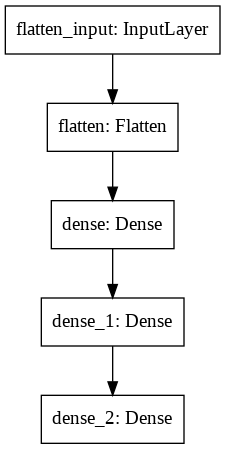

In [33]:
keras.utils.plot_model(model)

In [34]:
# fetching model's layers
model.layers

In [35]:
# fetching layers by name
hidden1 = model.layers[1]
hidden1.name

'dense'

In [36]:
model.get_layer('dense') is hidden1

True

In [37]:
# accessing all the parameters of a layer
weights, biases = hidden1.get_weights()
print(weights)

[[-0.03850377 -0.0639497   0.01544902 ...  0.04490641  0.05413403
   0.03375058]
 [-0.0074784  -0.02301096  0.05195278 ...  0.04304158 -0.03409453
  -0.0356026 ]
 [ 0.02373288 -0.00618102  0.00790612 ...  0.03714737 -0.0720391
  -0.01579001]
 ...
 [-0.06517303  0.04319925 -0.00746946 ... -0.03972377  0.07243133
   0.0459312 ]
 [ 0.04175569  0.02459447 -0.04410376 ...  0.03635    -0.07304505
  -0.04100383]
 [ 0.06509244  0.01206921 -0.06134788 ... -0.01284194 -0.0156527
   0.06279133]]


Notice that all the weights are intialized randomly when the neural network model was defined

In [38]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
weights.shape

(784, 300)

In [40]:
biases.shape

(300,)

The shape of the weight matrix depends on the number of inputs. This is why it is recommended to specify the input_shape when creating the first layer of the model. If input shape is not specified Keras will wait until it knows the input shape before it actually builds the model. Until the model is really built, the layers will not have weights initialized, and you will not be able to do certain things (such as print the model summary or save the model)

#### Compiling the model

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])

If you want to convert sparse labels to one-hot vector labels use the keras.utils.to_categorical() function. To go the other way round, use the np.argmax() function with axis=1

#### Training and evaluating the model

In [42]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.4344 - accuracy: 0.5971 - val_loss: 0.9624 - val_accuracy: 0.7102
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.8523 - accuracy: 0.7278 - val_loss: 0.7478 - val_accuracy: 0.7588
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7157 - accuracy: 0.7689 - val_loss: 0.6610 - val_accuracy: 0.7902
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6466 - accuracy: 0.7912 - val_loss: 0.6073 - val_accuracy: 0.8070
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.6023 - accuracy: 0.8045 - val_loss: 0.5719 - val_accuracy: 0.8172
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5709 - accuracy: 0.8130 - val_loss: 0.5500 - val_accuracy: 0.8268
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5476 - accuracy: 0.8190 - val_loss: 0.5283 - val_accuracy:

In [43]:
# trying with adam optimizer
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer="adam", metrics=["accuracy"])

In [44]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4471 - accuracy: 0.8416 - val_loss: 0.3870 - val_accuracy: 0.8590
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3668 - accuracy: 0.8655 - val_loss: 0.3431 - val_accuracy: 0.8770
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3326 - accuracy: 0.8782 - val_loss: 0.3540 - val_accuracy: 0.8704
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.8856 - val_loss: 0.3347 - val_accuracy: 0.8844
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2867 - accuracy: 0.8937 - val_loss: 0.3198 - val_accuracy: 0.8846
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2722 - accuracy: 0.8975 - val_loss: 0.3064 - val_accuracy: 0.8910
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2604 - accuracy: 0.9019 - val_loss: 0.3080 - val_accuracy:

The fit() method returns a History object containing the training parameters (history.params), the list of epochs(hisotry.epoch) and dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set

In [45]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [46]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [47]:
history.history

{'accuracy': [0.5971090793609619,
  0.7277818322181702,
  0.7689454555511475,
  0.7911818027496338,
  0.8044545650482178,
  0.8129818439483643,
  0.8190000057220459,
  0.8232181668281555,
  0.8268181681632996,
  0.8303636312484741,
  0.8329636454582214,
  0.8353272676467896,
  0.83729088306427,
  0.8396363854408264,
  0.8407818078994751,
  0.8435454368591309,
  0.8449636101722717,
  0.8474181890487671,
  0.8484545350074768,
  0.849399983882904,
  0.8512545228004456,
  0.8529818058013916,
  0.8538181781768799,
  0.8552181720733643,
  0.8563091158866882,
  0.8571090698242188,
  0.8582545518875122,
  0.8603272438049316,
  0.8605090975761414,
  0.860945463180542],
 'loss': [1.434433937072754,
  0.8523358702659607,
  0.7156754732131958,
  0.6465639472007751,
  0.6022574305534363,
  0.5708913207054138,
  0.5475531816482544,
  0.529218852519989,
  0.514235258102417,
  0.5018395781517029,
  0.491470068693161,
  0.48244285583496094,
  0.47418609261512756,
  0.4667907953262329,
  0.4605013728141

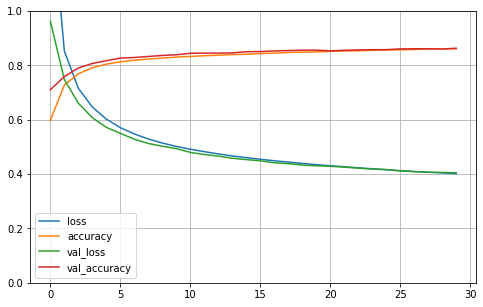

In [48]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [49]:
model.evaluate(X_test, y_test)                                                                                                                                                                  

313/313 [==============================] - 1s 2ms/step - loss: 85.3404 - accuracy: 0.8713


[85.3403549194336, 0.8712999820709229]

#### Using the model to make predictions

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [52]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')